#### Implement the Naive Bayes Classifier on Covid Dataset to predict whether a patient is covid +ve or not.


#### Compute the accuarcy, precision, recall, F1 Score ROC Curve of the classifier, considering 80% of the training data.
Draw the validation curves of the classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [2]:
data = pd.read_csv('covid.csv')
data


,pc,wbc,mc,ast,bc,ldh,diagnosis
0,Low,Low,Low,High,Normal,Normal,True
1,Low,Low,Normal,High,Normal,High,True
2,Low,High,Normal,High,Normal,Normal,False
3,Low,High,Normal,High,High,Normal,True
4,Low,Normal,High,High,Normal,Normal,False
5,Low,Normal,Normal,High,Normal,High,True
6,Normal,Low,Low,High,Normal,Normal,True
7,Normal,High,Normal,High,Normal,Normal,False
8,Normal,High,Normal,High,High,High,True
9,Normal,Normal,High,High,Normal,Normal,False


In [3]:
le = preprocessing.LabelEncoder()
pc = le.fit_transform(data['pc'].values)
wbc = le.fit_transform(data['wbc'].values)
mc = le.fit_transform(data['mc'].values)
ast = le.fit_transform(data['ast'].values)
bc = le.fit_transform(data['bc'].values)
ldh = le.fit_transform(data['ldh'].values)
y = le.fit_transform(data['diagnosis'].values)

In [4]:
X = np.array(list(zip(pc, wbc, mc, ast, bc, ldh)))

In [5]:
X

array([[1, 1, 1, 0, 1, 1],
       [1, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 1, 1],
       [1, 0, 2, 0, 0, 1],
       [1, 2, 0, 0, 1, 1],
       [1, 2, 2, 0, 1, 0],
       [2, 1, 1, 0, 1, 1],
       [2, 0, 2, 0, 1, 1],
       [2, 0, 2, 0, 0, 0],
       [2, 2, 0, 0, 1, 1],
       [2, 2, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 2, 0, 1, 1, 1],
       [0, 2, 0, 1, 0, 0],
       [0, 0, 2, 1, 1, 0],
       [1, 2, 0, 0, 0, 1],
       [2, 2, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0],
       [2, 2, 2, 0, 1, 1],
       [2, 0, 2, 0, 1, 0],
       [2, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 2, 1, 1, 1],
       [0, 2, 2, 1, 1, 1]])

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
naivee = MultinomialNB()
naivee.fit(xtrain, ytrain)
ypred = naivee.predict(xtest)


In [7]:
print("Accuracy: ", accuracy_score(ytest, ypred))
print("Classification Report: \n", classification_report(ytest, ypred))

Accuracy:  0.5714285714285714
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.50      1.00      0.67         3

    accuracy                           0.57         7
   macro avg       0.75      0.62      0.53         7
weighted avg       0.79      0.57      0.51         7



In [8]:
lr_probs = naivee.predict_proba(xtest)

In [9]:
type(lr_probs)

numpy.ndarray

In [10]:
lr_probs

array([[0.15174724, 0.84825276],
       [0.16705485, 0.83294515],
       [0.45992483, 0.54007517],
       [0.07365241, 0.92634759],
       [0.32011039, 0.67988961],
       [0.6766054 , 0.3233946 ],
       [0.10871304, 0.89128696]])

In [11]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [12]:
lr_probs

array([0.84825276, 0.83294515, 0.54007517, 0.92634759, 0.67988961,
       0.3233946 , 0.89128696])

In [13]:
lr_fpr, lr_tpr, _=roc_curve(ytest, lr_probs)

In [14]:
lr_fpr

array([0. , 0. , 0. , 0.5, 0.5, 1. ])

In [15]:
lr_tpr

array([0.        , 0.33333333, 0.66666667, 0.66666667, 1.        ,
       1.        ])

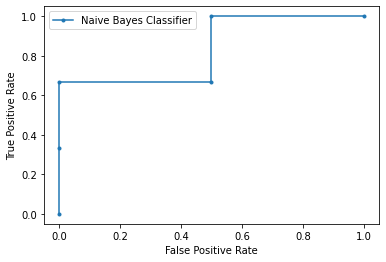

In [16]:
from matplotlib import pyplot
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Naive Bayes Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()